In [62]:
%matplotlib inline


In [85]:
# imports

import importlib
try:
    import seaborn as sns; sns.set_style("white")
except:
    pass

import time
import numpy as np
import bokeh
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

from matplotlib import pyplot as plt

output_notebook()

from linetools.spectra.xspectrum1d import XSpectrum1D

from pyigm.fN.fnmodel import FNModel
from pyigm.fN import tau_eff as teff


Loading BokehJS ...

In [64]:

from pyigm import utils as pyigmu


In [65]:

fN_I14 = FNModel('Gamma')


In [66]:
fN_I14.zmnx

(0.0, 10.0)

In [67]:
fN_default = FNModel.default_model()

Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz


In [68]:

fN_default

<FNModel: Hspline zmnx=(0.5,3) zpivot=2.4, gamma=1.5>

In [69]:
fN_default = FNModel.default_model()
lX = fN_default.calculate_lox(2.4, 17.19+np.log10(2.), 23.) 
print('l(X) = {:g}'.format(lX))

Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz
l(X) = 0.362987


In [70]:

fN_default = FNModel.default_model()
zval,teff_LL = teff.lyman_limit(fN_default, 0.5, 2.45)


Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz


In [71]:

zval[0], teff_LL[0]

(0.5, 1.8429875838699887)

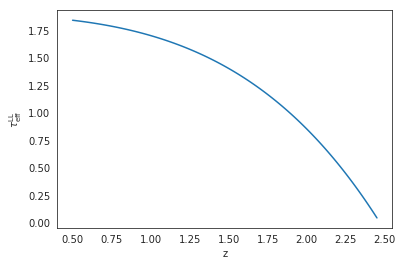

In [72]:
plt.clf()
plt.plot(zval,teff_LL)
# 
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}^{\rm LL}$')
plt.show()

In [73]:

z = 2.44
mfp = fN_default.mfp(z)
mfp


<Quantity 252.6393047 Mpc>

In [74]:
# Evaluate
rho_HI = fN_default.calculate_rhoHI(z, (20.3, 22.))
print('rho_HI = {:g}'.format(rho_HI))

rho_HI = 8.358e+07 solMass / Mpc3


In [75]:

reload(teff)
DM = teff.DM(1.)
print(DM)


Using a Planck15 cosmology with H0=67.74 km / (Mpc s) and Om=0.3075 and Ob=0.0486
1235.82826463 pc / cm3


In [76]:

pyigmu.mk_ew_lyman_spline(24, 'EW_SPLINE_b24.yml')


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
line = 912.703
line = 912.768
line = 912.839
line = 912.918
line = 913.006
line = 913.104
line = 913.215
line = 913.339
line = 913.48
line = 913.641
line = 913.826
line = 914.038
line = 914.286
line = 914.576
line = 914.919
line = 915.329
line = 915.824
line = 916.429
line = 917.181
line = 918.129
line = 919.351
line = 920.963
line = 923.15
line = 926.226
line = 930.748
line = 937.803
line = 949.743
line = 972.537
line = 1025.72
line = 1215.67
Writing EW_SPLINE_b24.yml


In [78]:

fN_model = FNModel.default_model()
# tau_eff
lamb = 1215.6701*(1+2.4)
lya_teff = teff.lyman_ew(lamb, 2.5, fN_model, NHI_MIN=12., NHI_MAX=17.)
print('teff(Lya) = {:g}'.format(lya_teff))


Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
teff(Lya) = 0.198273


In [80]:
import multiprocessing
from linetools.lists.linelist import LineList
import copy
from astropy import units as u
HI = LineList('HI')
tst_wv = HI._data['wrest']
    
# f(N)
fN_model = FNModel.default_model()
# Evaluations
saw_wv = np.linspace(910., 1220., num=1000)*u.AA
#
adict = []
for wrest in saw_wv:
    tdict = dict(ilambda=wrest.value*(1+2.4), zem=2.5, fN_model=fN_model,
                wrest=copy.deepcopy(tst_wv))
    adict.append(tdict)

print(time.asctime( time.localtime(time.time()) ))
pool = multiprocessing.Pool(4) # initialize thread pool N threads
ateff = pool.map(teff.map_lymanew, adict)
print(time.asctime( time.localtime(time.time()) ))


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /mnt/c/Users/jiawen/vir_en/lib/python2.7/site-packages/pyigm/data/fN/fN_spline_z24.fits.gz
Thu Dec  8 00:01:31 2022
Thu Dec  8 00:02:16 2022


In [83]:
# Lya
p = figure(plot_width=500, plot_height=400, title='Sawtooth (z=2.5)')
# Data
p.line(saw_wv.value, np.exp(-1*np.array(ateff)), color='black', line_width=2)
# Labels
p.xaxis.axis_label = "Rest Wavelength"
p.yaxis.axis_label = "Transmission"
# Show

show(p)


In [89]:

from pyigm.fN import mockforest as pyimock